# 🚗 Radial Velocities: Stars That Wobble

Well well well, you've wrangled transits. You've folded light curves like a laundry wizard.  
Now it's time to tackle another exoplanet detection method: **Radial Velocities** (RVs).

While transits are all about *light dips*, RVs are about *stellar wobbles*.  
Because when a planet tugs on its star, that star doesn’t sit still — it pirouettes like a drunk ballerina.  
And we can detect that motion through the Doppler shift of its spectral lines. 

Today, you'll work with a beautifully clean, **fake** RV dataset I made (becuase real RV data is **EXTREMELY NOISY**).  
It is free of instrumental offsets, moonlight contamination, and referee comments.  
This is pure, idealised planet-wobble data — a sandbox to test your orbital intuition.

We'll go step by step:
- 👀 Look at the data
- 🧠 Guess the orbital period
- 🔁 Phase fold
- 🧩 Fit a sine curve
- 🪐 Estimate the planet’s mass (well, \($M_P\sin i$), but you get the idea)

You’ll come out the other end with a newfound respect for sinusoidal curves and possibly a PhD.

Let’s get wobbling.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 📦 Step 1: Read in the data

First, let’s load the RV data for our beautiful fake planet.

👉 **Make sure you have downloaded the `.csv` file from GitHub and saved it in the *same directory* as your Jupyter notebook.**

If the next cell throws an error, it’s because:
1. You didn’t download the file  
2. You saved it somewhere dumb  
3. You spelled the filename wrong  
4. Ben Stokes interfered

Fix any of the above and try again.

In [27]:
df = pd.read_csv('RV_Data.csv')
df.head()

,time,rv,rv_err
0,0.520282,45.715585,3.0
1,0.577695,47.056428,3.0
2,0.854320,49.999808,3.0
3,1.074663,48.057402,3.0
4,1.658587,26.446970,3.0


## 📈 Step 2: Plot the data

Let’s see what this star’s up to. Plot the radial velocity measurements over time, with error bars.

Questions to ask yourself:
- Does it look sinusoidal?
- Can you spot roughly how long one “wobble” takes?
- Is there more than one full orbit in the time range?

Plot first. Interpret later.

In [30]:
# TODO: Extract the time and rv signal from the dataframe (df) to two separate arrays
time = df['time']
rv = df['rv']
rv_err = df['rv_err']

# TODO: Plot the RV Signal against time

## ⏳ Step 3: Estimate the orbital period by eye

Take a look at the RV curve you just plotted.  
Each full “wave” (up + down) is one orbit.

Try to eyeball the time between two consecutive peaks or troughs.  
Write your guess below ⬇

In [ ]:
# TODO: What's your best guess for the orbital period?
my_period = # e.g. 5.0

**Time for the big guns**

In [31]:
from astropy.timeseries import LombScargle

frequency, power = LombScargle(time, rv, rv_err).autopower()
best_freq = frequency[np.argmax(power)]
best_period = 1 / best_freq
print(f"Best period = {best_period:.4f} days")

Best period = 4.9524 days


In [ ]:
diff = np.abs(best_period - my_period)

if diff < 0.3:
    print(f"Bang on! You were only off by {diff:.3f} days. You little orbital wizard.")
elif diff < 1:
    print(f"Close enough - off by {diff:.3f} days. Solid work, future Doppler slinger.")
elif diff < 3:
    print(f"Meh. {diff:.3f} days off. Not awful, but I wouldn't trust you with the James Webb.")
elif diff < 100:
    print(f"{diff:.3f} days off. Have you considered a career in interpretive dance instead?")
else:
    print("That’s not even in the same galaxy. Did you guess using tea leaves?")

## 🔁 Step 4: Phase-fold the RV data

Now that we’ve got the true period, let’s wrap the data around that period so all the wobbles line up nicely.

We’ll convert each observation time into an **orbital phase**:
- Phase = (time % period) / period

Then we’ll plot RV vs phase and admire the siney goodness.

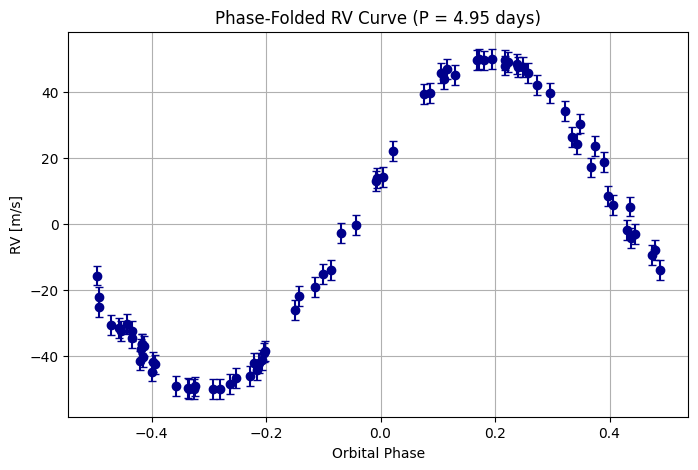

In [32]:
# TODO: Convert the time array to phase



# TODO: Plot the RV signal vs phase

## 🧮 Step 5: Fit a sine curve to the RV data

Now that you’ve seen the phase-folded wobble, let’s fit it with a model.

We’ll assume a nice, circular orbit (eccentricity = 0), so the RV curve is just a sine wave:
\begin{equation}
v(t) = K \sin\left( \frac{2\pi t}{P} + \phi \right) + \gamma
\end{equation}

### 🧠 What do these symbols mean?

- \( K \): the **semi-amplitude** of the wobble  
  - how fast the star moves due to the planet's tug  
  - measured in **m/s**  
  - bigger \( K \) = heavier planet or closer orbit

- \( P \): the **orbital period** of the planet (you already found this!)  
  - measured in **days**  

- \( $\phi$ \): the **phase offset**  
  - shifts the curve left or right  
  - depends on where in the orbit you started observing

- \( $\gamma$ \): the **systemic velocity**  
  - the average velocity of the star’s motion through space  
  - we’re just watching the wiggle around that average

Your job is to:
1. Define the function
2. Fit it to the data
3. Extract \( K \), \( $\phi$ \), and \( $\gamma$ \)

We’ll use `curve_fit`, which is like throwing a best-fit boomerang at your data.

In [33]:
from scipy.optimize import curve_fit
import numpy as np

# Define the RV model function
def rv_model(t, K, phi, gamma):
    model =   # TODO: Define the model as shown in the cell above
    return model

# Initial guesses: amplitude, phase offset, systemic velocity
p0 = [np.ptp(rv)/2, 0, np.mean(rv)]

# Fit the model
popt, pcov = curve_fit(rv_model, time, rv, sigma=rv_err, p0=p0)

# Extract fit parameters
K_fit, phi_fit, gamma_fit = popt
print(f"Fitted semi-amplitude K = {K_fit:.2f} m/s")
print(f"Phase offset φ = {phi_fit:.2f} rad")
print(f"Systemic velocity γ = {gamma_fit:.2f} m/s")

Fitted semi-amplitude K = 49.84 m/s
Phase offset φ = 0.37 rad
Systemic velocity γ = -0.52 m/s


## 🪐 Step 6: Estimate the Planet's Minimum Mass

Now that you’ve fitted the RV curve, you’ve got the **semi-amplitude \( K \)** — a direct clue to how massive the planet is.

Let’s estimate the **minimum mass** of the planet, which we call:
\[
M_p \sin i
\]

Why the \( \sin i \)?  
Because we can only see the velocity along our line of sight — not the full 3D motion — unless the system is edge-on (i.e. \( i = 90^\circ \), like in transits).

---

### 🧠 The Formula (approximate, circular orbits):

\begin{equation}
M_p \sin i \approx \frac{K \, P^{1/3} \, M_\star^{2/3}}{28.4}
\end{equation}

Where:
- \( K \) = RV semi-amplitude [m/s]  
- \( P \) = orbital period [days]  
- \( $M_\star$ \) = stellar mass [solar masses]  
- The output is in **Earth masses ($M_\odot$)**

This is a simplified version of the full Keplerian mass function, but it's very good for circular orbits and smallish planets.

Time to plug and chug.

In [ ]:
# Use the values you already have
K =                    # [m/s]
P =                    # [days]
M_star =               # Assume 1 solar mass (change if you're feeling wacky)

# Approximate formula (from Kepler + unit conversion)
Mpsini = # TODO: Use the equation for mass as defined above
print(f"Estimated M_p sin(i) ≈ {Mpsini:.2f} Earth Masses")

## ⚖️ Step 7 : Compare to a real planet

Based on your estimates — period, RV amplitude, and minimum mass — what kind of planet is this?

Try searching for planets with similar:
- \( $P$ \) = orbital period
- \( $M_p \sin i$ \) = minimum mass

👉 Use this site: [https://exoplanet.eu/catalog/](https://exoplanet.eu/catalog/)

Does your fake planet resemble:
- A hot Jupiter?
- A mini-Neptune?
- A weirdo nobody’s ever found?

Drop your thoughts below:

TODO: Write a short description of what kind of planet you think you've detected

(Double click the cell to edit it)

## 🎛️ Step 8: Play with the Planet Parameters

Now it’s your turn to be the exoplanet God.

Below is a cell where you can tweak the fake planet’s properties:
- \( $P$ \): orbital period  
- \( $K$ \): RV semi-amplitude  
- \( $\phi$ \): phase offset  
- \( $\gamma$ \): systemic velocity  
- \( $\sigma$ \): noise level  

Try generating different fake planets and rerun the notebook from the top:
- What happens if the period is longer?
- What if the planet is tiny (small K)?
- At what point does the signal vanish in the noise?

Break things. Fix them. Learn stuff.

In [ ]:
# PARAMETERS for your fake planet
P = 5.0               # orbital period [days]
K = 50.0              # semi-amplitude [m/s]
phi = 0.5             # phase offset [radians]
gamma = 0.0           # systemic velocity [m/s]
t_span = 30           # observation window [days]
n_points = 40         # number of observations
jitter = 1.0          # noise level [m/s]

# Generate timestamps
time = np.sort(np.random.uniform(0, t_span, n_points))

# True RV model
rv_true = K * np.sin(2 * np.pi * time / P + phi) + gamma

# Add noise
noise = np.random.normal(0, jitter, size=n_points)
rv_obs = rv_true + noise

# Save to CSV
import pandas as pd
df = pd.DataFrame({'time': time, 'rv': rv_obs, 'rv_err': np.full(n_points, jitter)})
df.to_csv("fake_rv_planet.csv", index=False)

# Plot
plt.errorbar(time, rv_obs, yerr=jitter, fmt='o')
plt.xlabel("Time [days]")
plt.ylabel("RV [m/s]")
plt.show()

## 🔀 Step 9: Add Some Eccentricity

So far, we’ve assumed our planet orbits in a perfect circle — which is adorable but wrong.  
Most real exoplanets have at least **some** orbital eccentricity. That means:

- The star moves faster near **periastron** (closest point),
- Slower near **apastron** (farthest point),
- The RV curve is **no longer a perfect sine wave**.

To model this properly, we’ll use a slightly more complicated RV function based on orbital mechanics.

Let’s generate a fake planet with an eccentric orbit and compare the RV shape to a circular one.

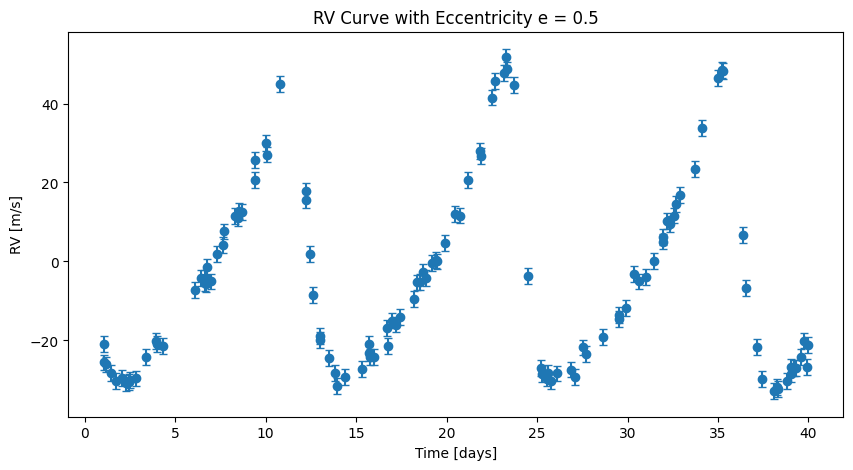

In [37]:
from scipy.optimize import newton

# Orbital parameters
P = 12.0             # period [days]
K = 40.0             # semi-amplitude [m/s]
e = 0.5              # eccentricity (try 0.0, 0.3, 0.6, etc.)
omega = np.pi/3      # argument of periastron [radians]
gamma = 0.0          # systemic velocity [m/s]
phi = 0              # phase offset [ignored for now]
jitter = 2.0
t_span = 40
n_points = 120

# Generate times
time = np.sort(np.random.uniform(0, t_span, n_points))
M = 2 * np.pi * (time % P) / P  # Mean anomaly

# Solve Kepler’s equation: M = E - e sin(E)
def solve_kepler(M_array, e):
    E_array = []
    for M in M_array:
        func = lambda E: E - e * np.sin(E) - M
        E_root = newton(func, M)  # use M as initial guess
        E_array.append(E_root)
    return np.array(E_array)

E = solve_kepler(M, e)
# True anomaly f
f = 2 * np.arctan2(np.sqrt(1+e)*np.sin(E/2), np.sqrt(1-e)*np.cos(E/2))
# RV equation for eccentric orbit
rv_ecc = K * (np.cos(f + omega) + e * np.cos(omega)) + gamma
rv_obs = rv_ecc + np.random.normal(0, jitter, n_points)

# Save to CSV
df = pd.DataFrame({'time': time, 'rv': rv_obs, 'rv_err': np.full(n_points, jitter)})
df.to_csv("fake_eccentric_rv.csv", index=False)

# Plot it
plt.figure(figsize=(10,5))
plt.errorbar(time, rv_obs, yerr=jitter, fmt='o', capsize=3)
plt.xlabel("Time [days]")
plt.ylabel("RV [m/s]")
plt.title(f"RV Curve with Eccentricity e = {e}")
plt.show()

### 🎭 What to observe:

- Is the RV curve still symmetric?
- Does the star seem to "speed up" near some parts of the orbit? If so, why?
- What happens if you change `e` from 0.0 → 0.3 → 0.6 → 0.9?
- Try comparing an eccentric curve with a circular one on the same plot.

This is why astronomers fit for **eccentricity** and **argument of periastron** — real planets are weirdos.